Installing Scikit-Learn, TensorFlow, and Keras for Machine Learning

In [ ]:
!pip install scikeras
!pip install tensorflow==2.15.0
!pip install keras==2.15.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 35.5 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.14.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.14.0
    Uninstalling tensorflow-2.14.0:
      Successfully

IMPORTING LIBRARIES

In [ ]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from google.colab import drive

import pandas_datareader as pdr


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
maindf=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BTC-USD.csv')

EXPLORATORY DATA ANALYSIS

In [ ]:
maindf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3354 entries, 0 to 3353
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3354 non-null   object 
 1   Open       3354 non-null   float64
 2   High       3354 non-null   float64
 3   Low        3354 non-null   float64
 4   Close      3354 non-null   float64
 5   Adj Close  3354 non-null   float64
 6   Volume     3354 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 183.5+ KB


In [ ]:
# Assuming 'Date' is the column representing dates in your DataFrame
fig = px.line(maindf, x='Date', y=['Open', 'Close', 'High', 'Low'],
              labels={'Date': 'Date', 'value': 'Stock value'})
fig.update_layout(title='Bitcoin Stock Analysis', xaxis_title='Date', yaxis_title='Stock value')
fig.show()


In [ ]:
correlation_matrix = maindf.corr()
target_correlation = correlation_matrix['Adj Close'].drop('Adj Close')  # Correlation of 'Close' with other columns
print(target_correlation)

Open      0.998808
High      0.999463
Low       0.999364
Close     1.000000
Volume    0.684083
Name: Adj Close, dtype: float64


<ipython-input-7-1996443433e1>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3354 entries, 0 to 3353
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3354 non-null   object 
 1   Open       3354 non-null   float64
 2   High       3354 non-null   float64
 3   Low        3354 non-null   float64
 4   Close      3354 non-null   float64
 5   Adj Close  3354 non-null   float64
 6   Volume     3354 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 183.5+ KB


In [ ]:
maindf.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3354.000000,3354.000000,3354.000000,3354.000000,3354.000000,3.354000e+03
mean,14259.983804,14596.508035,13896.200260,14269.671698,14269.671698,1.648464e+10
std,16016.228187,16406.209271,15576.579969,16016.405289,16016.405289,1.917110e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,897.221771,911.216736,868.459503,898.884765,898.884765,1.475395e+08
50%,8162.063233,8293.490723,7936.015137,8165.781983,8165.781983,1.098780e+10
75%,23126.887695,23537.548828,22719.220215,23138.952637,23138.952637,2.694028e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [ ]:
print('Null Values:',maindf.isnull().values.sum())

Null Values: 0


In [ ]:
print('NA values:',maindf.isnull().values.any())

NA values: False


In [ ]:
# Final shape of the dataset after dealing with null values

maindf.shape

(3354, 7)

In [ ]:
# Printing the start date and End date of the dataset

sd=maindf.iloc[0][0]
ed=maindf.iloc[-1][0]


print('Starting Date',sd)
print('Ending Date',ed)

Starting Date 2014-09-17
Ending Date 2023-11-22


In [ ]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_overall = maindf.loc[(maindf['Date'] >= '2014-09-17')
                     & (maindf['Date'] <= '2023-11-22')]

y_overall.drop(y_overall[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
0,2014-09-17,465.864014,468.174011,452.421997,457.334015
1,2014-09-18,456.859985,456.859985,413.104004,424.440002
2,2014-09-19,424.102997,427.834991,384.532013,394.795990
3,2014-09-20,394.673004,423.295990,389.882996,408.903992
4,2014-09-21,408.084991,412.425995,393.181000,398.821014
...,...,...,...,...,...
3349,2023-11-18,36625.371094,36839.281250,36233.312500,36585.703125
3350,2023-11-19,36585.765625,37509.355469,36414.597656,37386.546875
3351,2023-11-20,37374.074219,37756.820313,36882.531250,37476.957031
3352,2023-11-21,37469.160156,37631.140625,35813.812500,35813.812500


In [ ]:
monthvise= y_overall.groupby(y_overall['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,13653.879059,13653.079616
February,14841.738755,14909.331519
March,15918.528798,15975.969187
April,16654.181964,16645.847732
May,14897.735676,14807.430843
June,13058.934120,13023.092093
July,12946.813125,12989.735743
August,14402.491680,14403.907037
September,13142.241365,13122.887938


In [ ]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_overall, x=y_overall.Date, y=[y_overall['Open'], y_overall['Close'],
                                          y_overall['High'], y_overall['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [ ]:
closedf = maindf[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (3354, 2)


In [ ]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price 2014-2023', plot_bgcolor='white',
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
closedf = closedf[closedf['Date'] > '2021-02-19']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  1006


In [ ]:
closedf

,Date,Close
2348,2021-02-20,56099.519531
2349,2021-02-21,57539.945313
2350,2021-02-22,54207.320313
2351,2021-02-23,48824.425781
2352,2021-02-24,49705.332031
...,...,...
3349,2023-11-18,36585.703125
3350,2023-11-19,37386.546875
3351,2023-11-20,37476.957031
3352,2023-11-21,35813.812500


In [ ]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Bitcoin close price',
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(1006, 1)


PREPARING TRAINING AND TESTING DATA

In [ ]:
training_size=int(len(closedf)*0.60)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (603, 1)
test_data:  (403, 1)


In [ ]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (587, 15)
y_train:  (587,)
X_test:  (387, 15)
y_test (387,)


In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (587, 15, 1)
X_test:  (387, 15, 1)


FIRST MODEL: SIMPLE FUNCTIONAL API

In [ ]:
inputs = Input(shape=(None, 1))
lstm_layer = LSTM(10, activation='relu')(inputs)
output_layer = Dense(1)(lstm_layer)
model = Model(inputs=inputs, outputs=output_layer)
model.compile(loss='mean_squared_error', optimizer='adam')


In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
19/19 [==============================] - 2s 20ms/step - loss: 0.3638 - val_loss: 0.0365
Epoch 2/200
19/19 [==============================] - 0s 7ms/step - loss: 0.2035 - val_loss: 0.0086
Epoch 3/200
19/19 [==============================] - 0s 9ms/step - loss: 0.0445 - val_loss: 0.0223
Epoch 4/200
19/19 [==============================] - 0s 9ms/step - loss: 0.0158 - val_loss: 0.0114
Epoch 5/200
19/19 [==============================] - 0s 7ms/step - loss: 0.0114 - val_loss: 0.0124
Epoch 6/200
19/19 [==============================] - 0s 7ms/step - loss: 0.0105 - val_loss: 0.0102
Epoch 7/200
19/19 [==============================] - 0s 7ms/step - loss: 0.0100 - val_loss: 0.0092
Epoch 8/200
19/19 [==============================] - 0s 7ms/step - loss: 0.0097 - val_loss: 0.0083
Epoch 9/200
19/19 [==============================] - 0s 9ms/step - loss: 0.0094 - val_loss: 0.0072
Epoch 10/200
19/19 [==============================] - 0s 23ms/step - loss: 0.0092 - val_loss: 0.0070
Epoch 1

FIRST MODEL: TRAINING LOSS VS VALIDATION

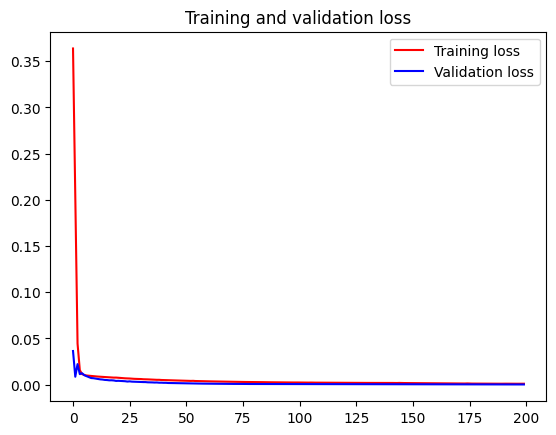

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


LSTM MODEL: GRID SEARCH CROSS VALIDATION AND OPTIMIZATION

In [ ]:


def create_model(optimizer='adam'):
    inputs = Input(shape=(None, 1))
    x = LSTM(10, activation='relu')(inputs)

    # Five hidden layers
    for _ in range(5):
        x = Dense(16, activation='relu')(x)

    output = Dense(1)(x)
    model = Model(inputs=inputs, outputs=output)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Define the Keras model instance
keras_model = KerasRegressor(build_fn=create_model, verbose=1)

# Define the parameters grid to search through
param_grid = {
    'optimizer': ['adam', 'sgd', 'rmsprop'],
    'epochs': [100, 150, 200],
    'batch_size': [32, 64, 128],
}

# Perform GridSearchCV
grid = GridSearchCV(estimator=keras_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_result = grid.fit(X_train, y_train)

# Get the best parameters
best_params = grid_result.best_params_
print("Best Parameters:", best_params)



/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
13/13 [==============================] - 3s 8ms/step - loss: 0.1654
Epoch 2/100
13/13 [==============================] - 0s 8ms/step - loss: 0.0542
Epoch 3/100
13/13 [==============================] - 0s 8ms/step - loss: 0.0269
Epoch 4/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0152
Epoch 5/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0080
Epoch 6/100
13/13 [==============================] - 0s 8ms/step - loss: 0.0043
Epoch 7/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0031
Epoch 8/100
13/13 [==============================] - 0s 8ms/step - loss: 0.0027
Epoch 9/100
13/13 [==============================] - 0s 8ms/step - loss: 0.0024
Epoch 10/100
13/13 [==============================] - 0s 8ms/step - loss: 0.0021
Epoch 11/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0020
Epoch 12/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0019
Epoch 13/100
13/13 [=================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



13/13 [==============================] - 2s 5ms/step - loss: 0.1443
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0398
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0232
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0134
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0078
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0047
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0036
Epoch 8/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0034
Epoch 9/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0032
Epoch 10/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0031
Epoch 11/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0030
Epoch 12/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0031
Epoch 13/100
13/13 [=============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



13/13 [==============================] - 2s 5ms/step - loss: 0.2799
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0625
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0215
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0133
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0104
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0090
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0077
Epoch 8/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0065
Epoch 9/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0055
Epoch 10/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0045
Epoch 11/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0038
Epoch 12/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0036
Epoch 13/100
13/13 [=============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
13/13 [==============================] - 3s 8ms/step - loss: 0.1844
Epoch 2/100
13/13 [==============================] - 0s 8ms/step - loss: 0.0746
Epoch 3/100
13/13 [==============================] - 0s 8ms/step - loss: 0.0194
Epoch 4/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0130
Epoch 5/100
13/13 [==============================] - 0s 8ms/step - loss: 0.0088
Epoch 6/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0067
Epoch 7/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0053
Epoch 8/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0046
Epoch 9/100
13/13 [==============================] - 0s 8ms/step - loss: 0.0040
Epoch 10/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0034
Epoch 11/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0030
Epoch 12/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0025
Epoch 13/100
13/13 [=================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



13/13 [==============================] - 2s 5ms/step - loss: 0.1969
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1439
Epoch 3/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0837
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0536
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0455
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0343
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0158
Epoch 8/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0037
Epoch 9/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0024
Epoch 10/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0019
Epoch 11/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0018
Epoch 12/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0017
Epoch 13/100
13/13 [=============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



13/13 [==============================] - 2s 6ms/step - loss: 0.3309
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 0.2012
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0351
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0099
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0077
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0062
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0056
Epoch 8/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0055
Epoch 9/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0054
Epoch 10/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0054
Epoch 11/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0053
Epoch 12/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0053
Epoch 13/100
13/13 [=============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



13/13 [==============================] - 3s 8ms/step - loss: 0.2232
Epoch 2/100
13/13 [==============================] - 0s 8ms/step - loss: 0.1708
Epoch 3/100
13/13 [==============================] - 0s 8ms/step - loss: 0.1082
Epoch 4/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0559
Epoch 5/100
13/13 [==============================] - 0s 8ms/step - loss: 0.0418
Epoch 6/100
13/13 [==============================] - 0s 8ms/step - loss: 0.0287
Epoch 7/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0141
Epoch 8/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0068
Epoch 9/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0043
Epoch 10/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0028
Epoch 11/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0025
Epoch 12/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0029
Epoch 13/100
13/13 [=============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
13/13 [==============================] - 2s 5ms/step - loss: 0.1895
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 0.1193
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0557
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0336
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0250
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0154
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0076
Epoch 8/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0037
Epoch 9/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0032
Epoch 10/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0027
Epoch 11/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0025
Epoch 12/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0025
Epoch 13/100
13/13 [=================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



13/13 [==============================] - 2s 5ms/step - loss: 0.4060
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 0.3285
Epoch 3/100
13/13 [==============================] - 0s 6ms/step - loss: 0.2710
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.2010
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1165
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0304
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0170
Epoch 8/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0124
Epoch 9/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0100
Epoch 10/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0089
Epoch 11/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0083
Epoch 12/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0077
Epoch 13/100
13/13 [=============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
13/13 [==============================] - 3s 9ms/step - loss: 0.2088
Epoch 2/150
13/13 [==============================] - 0s 7ms/step - loss: 0.1330
Epoch 3/150
13/13 [==============================] - 0s 7ms/step - loss: 0.0416
Epoch 4/150
13/13 [==============================] - 0s 8ms/step - loss: 0.0167
Epoch 5/150
13/13 [==============================] - 0s 7ms/step - loss: 0.0107
Epoch 6/150
13/13 [==============================] - 0s 7ms/step - loss: 0.0063
Epoch 7/150
13/13 [==============================] - 0s 7ms/step - loss: 0.0049
Epoch 8/150
13/13 [==============================] - 0s 7ms/step - loss: 0.0038
Epoch 9/150
13/13 [==============================] - 0s 7ms/step - loss: 0.0031
Epoch 10/150
13/13 [==============================] - 0s 7ms/step - loss: 0.0026
Epoch 11/150
13/13 [==============================] - 0s 7ms/step - loss: 0.0022
Epoch 12/150
13/13 [==============================] - 0s 7ms/step - loss: 0.0020
Epoch 13/150
13/13 [=================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



13/13 [==============================] - 2s 9ms/step - loss: 0.2152
Epoch 2/150
13/13 [==============================] - 0s 9ms/step - loss: 0.1793
Epoch 3/150
13/13 [==============================] - 0s 7ms/step - loss: 0.1454
Epoch 4/150
13/13 [==============================] - 0s 7ms/step - loss: 0.1058
Epoch 5/150
13/13 [==============================] - 0s 7ms/step - loss: 0.0659
Epoch 6/150
13/13 [==============================] - 0s 7ms/step - loss: 0.0387
Epoch 7/150
13/13 [==============================] - 0s 7ms/step - loss: 0.0233
Epoch 8/150
13/13 [==============================] - 0s 7ms/step - loss: 0.0082
Epoch 9/150
13/13 [==============================] - 0s 8ms/step - loss: 0.0042
Epoch 10/150
13/13 [==============================] - 0s 7ms/step - loss: 0.0027
Epoch 11/150
13/13 [==============================] - 0s 8ms/step - loss: 0.0024
Epoch 12/150
13/13 [==============================] - 0s 7ms/step - loss: 0.0022
Epoch 13/150
13/13 [=============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



13/13 [==============================] - 2s 5ms/step - loss: 0.3420
Epoch 2/150
13/13 [==============================] - 0s 5ms/step - loss: 0.1768
Epoch 3/150
13/13 [==============================] - 0s 6ms/step - loss: 0.0383
Epoch 4/150
13/13 [==============================] - 0s 8ms/step - loss: 0.0275
Epoch 5/150
13/13 [==============================] - 0s 8ms/step - loss: 0.0195
Epoch 6/150
13/13 [==============================] - 0s 7ms/step - loss: 0.0186
Epoch 7/150
13/13 [==============================] - 0s 8ms/step - loss: 0.0171
Epoch 8/150
13/13 [==============================] - 0s 7ms/step - loss: 0.0156
Epoch 9/150
13/13 [==============================] - 0s 8ms/step - loss: 0.0139
Epoch 10/150
13/13 [==============================] - 0s 8ms/step - loss: 0.0120
Epoch 11/150
13/13 [==============================] - 0s 7ms/step - loss: 0.0100
Epoch 12/150
13/13 [==============================] - 0s 7ms/step - loss: 0.0082
Epoch 13/150
13/13 [=============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



13/13 [==============================] - 2s 5ms/step - loss: 0.1929
Epoch 2/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0969
Epoch 3/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0418
Epoch 4/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0328
Epoch 5/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0193
Epoch 6/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0084
Epoch 7/150
13/13 [==============================] - 0s 6ms/step - loss: 0.0036
Epoch 8/150
13/13 [==============================] - 0s 6ms/step - loss: 0.0026
Epoch 9/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0022
Epoch 10/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0021
Epoch 11/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0019
Epoch 12/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0019
Epoch 13/150
13/13 [=============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



13/13 [==============================] - 2s 5ms/step - loss: 0.1885
Epoch 2/150
13/13 [==============================] - 0s 5ms/step - loss: 0.1142
Epoch 3/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0542
Epoch 4/150
13/13 [==============================] - 0s 6ms/step - loss: 0.0363
Epoch 5/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0255
Epoch 6/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0126
Epoch 7/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0057
Epoch 8/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0040
Epoch 9/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0037
Epoch 10/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0030
Epoch 11/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0027
Epoch 12/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0026
Epoch 13/150
13/13 [=============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



13/13 [==============================] - 2s 6ms/step - loss: 0.3416
Epoch 2/150
13/13 [==============================] - 0s 6ms/step - loss: 0.2051
Epoch 3/150
13/13 [==============================] - 0s 6ms/step - loss: 0.0535
Epoch 4/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0176
Epoch 5/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0105
Epoch 6/150
13/13 [==============================] - 0s 6ms/step - loss: 0.0097
Epoch 7/150
13/13 [==============================] - 0s 6ms/step - loss: 0.0083
Epoch 8/150
13/13 [==============================] - 0s 6ms/step - loss: 0.0074
Epoch 9/150
13/13 [==============================] - 0s 6ms/step - loss: 0.0066
Epoch 10/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0061
Epoch 11/150
13/13 [==============================] - 0s 6ms/step - loss: 0.0056
Epoch 12/150
13/13 [==============================] - 0s 6ms/step - loss: 0.0053
Epoch 13/150
13/13 [=============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
13/13 [==============================] - 2s 6ms/step - loss: 0.1568
Epoch 2/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0513
Epoch 3/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0230
Epoch 4/150
13/13 [==============================] - 0s 6ms/step - loss: 0.0150
Epoch 5/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0062
Epoch 6/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0029
Epoch 7/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0022
Epoch 8/150
13/13 [==============================] - 0s 6ms/step - loss: 0.0019
Epoch 9/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0018
Epoch 10/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0016
Epoch 11/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0015
Epoch 12/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0015
Epoch 13/150
13/13 [=================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



13/13 [==============================] - 2s 5ms/step - loss: 0.1982
Epoch 2/150
13/13 [==============================] - 0s 6ms/step - loss: 0.1503
Epoch 3/150
13/13 [==============================] - 0s 6ms/step - loss: 0.0868
Epoch 4/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0408
Epoch 5/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0316
Epoch 6/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0209
Epoch 7/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0103
Epoch 8/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0049
Epoch 9/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0041
Epoch 10/150
13/13 [==============================] - 0s 6ms/step - loss: 0.0035
Epoch 11/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0029
Epoch 12/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0028
Epoch 13/150
13/13 [=============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



13/13 [==============================] - 2s 5ms/step - loss: 0.3398
Epoch 2/150
13/13 [==============================] - 0s 5ms/step - loss: 0.2129
Epoch 3/150
13/13 [==============================] - 0s 6ms/step - loss: 0.0771
Epoch 4/150
13/13 [==============================] - 0s 6ms/step - loss: 0.0139
Epoch 5/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0112
Epoch 6/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0095
Epoch 7/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0078
Epoch 8/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0068
Epoch 9/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0059
Epoch 10/150
13/13 [==============================] - 0s 6ms/step - loss: 0.0050
Epoch 11/150
13/13 [==============================] - 0s 6ms/step - loss: 0.0041
Epoch 12/150
13/13 [==============================] - 0s 6ms/step - loss: 0.0034
Epoch 13/150
13/13 [=============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



13/13 [==============================] - 2s 5ms/step - loss: 0.2061
Epoch 2/200
13/13 [==============================] - 0s 5ms/step - loss: 0.1340
Epoch 3/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0699
Epoch 4/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0465
Epoch 5/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0392
Epoch 6/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0298
Epoch 7/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0199
Epoch 8/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0107
Epoch 9/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0041
Epoch 10/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0027
Epoch 11/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0024
Epoch 12/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0022
Epoch 13/200
13/13 [=============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



13/13 [==============================] - 2s 6ms/step - loss: 0.1887
Epoch 2/200
13/13 [==============================] - 0s 5ms/step - loss: 0.1287
Epoch 3/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0633
Epoch 4/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0290
Epoch 5/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0204
Epoch 6/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0103
Epoch 7/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0051
Epoch 8/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0031
Epoch 9/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0035
Epoch 10/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0029
Epoch 11/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0026
Epoch 12/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0026
Epoch 13/200
13/13 [=============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



13/13 [==============================] - 2s 6ms/step - loss: 0.3389
Epoch 2/200
13/13 [==============================] - 0s 5ms/step - loss: 0.2301
Epoch 3/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0958
Epoch 4/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0123
Epoch 5/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0104
Epoch 6/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0069
Epoch 7/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0061
Epoch 8/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0058
Epoch 9/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0054
Epoch 10/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0051
Epoch 11/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0049
Epoch 12/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0047
Epoch 13/200
13/13 [=============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



13/13 [==============================] - 2s 5ms/step - loss: 0.2109
Epoch 2/200
13/13 [==============================] - 0s 5ms/step - loss: 0.1414
Epoch 3/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0701
Epoch 4/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0441
Epoch 5/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0368
Epoch 6/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0244
Epoch 7/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0119
Epoch 8/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0049
Epoch 9/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0036
Epoch 10/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0029
Epoch 11/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0026
Epoch 12/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0022
Epoch 13/200
13/13 [=============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



13/13 [==============================] - 2s 6ms/step - loss: 0.1667
Epoch 2/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0796
Epoch 3/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0349
Epoch 4/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0240
Epoch 5/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0125
Epoch 6/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0043
Epoch 7/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0029
Epoch 8/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0025
Epoch 9/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0022
Epoch 10/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0021
Epoch 11/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0021
Epoch 12/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0020
Epoch 13/200
13/13 [=============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



13/13 [==============================] - 2s 8ms/step - loss: 0.3536
Epoch 2/200
13/13 [==============================] - 0s 8ms/step - loss: 0.1796
Epoch 3/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0368
Epoch 4/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0098
Epoch 5/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0063
Epoch 6/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0053
Epoch 7/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0047
Epoch 8/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0044
Epoch 9/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0041
Epoch 10/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0039
Epoch 11/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0037
Epoch 12/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0036
Epoch 13/200
13/13 [=============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
13/13 [==============================] - 2s 8ms/step - loss: 0.2323
Epoch 2/200
13/13 [==============================] - 0s 7ms/step - loss: 0.1923
Epoch 3/200
13/13 [==============================] - 0s 7ms/step - loss: 0.1434
Epoch 4/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0945
Epoch 5/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0634
Epoch 6/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0523
Epoch 7/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0388
Epoch 8/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0191
Epoch 9/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0039
Epoch 10/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0030
Epoch 11/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0024
Epoch 12/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0022
Epoch 13/200
13/13 [=================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
13/13 [==============================] - 2s 6ms/step - loss: 0.2162
Epoch 2/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1696
Epoch 3/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1215
Epoch 4/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0623
Epoch 5/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0302
Epoch 6/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0218
Epoch 7/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0125
Epoch 8/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0067
Epoch 9/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0044
Epoch 10/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0038
Epoch 11/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0036
Epoch 12/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0034
Epoch 13/200
13/13 [=================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



13/13 [==============================] - 2s 6ms/step - loss: 0.3724
Epoch 2/200
13/13 [==============================] - 0s 6ms/step - loss: 0.3084
Epoch 3/200
13/13 [==============================] - 0s 6ms/step - loss: 0.2227
Epoch 4/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0913
Epoch 5/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0146
Epoch 6/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0090
Epoch 7/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0078
Epoch 8/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0071
Epoch 9/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0066
Epoch 10/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0063
Epoch 11/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0061
Epoch 12/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0059
Epoch 13/200
13/13 [=============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



7/7 [==============================] - 2s 6ms/step - loss: 0.2145
Epoch 2/100
7/7 [==============================] - 0s 6ms/step - loss: 0.1766
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 0.1366
Epoch 4/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0931
Epoch 5/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0522
Epoch 6/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0289
Epoch 7/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0261
Epoch 8/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0235
Epoch 9/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0177
Epoch 10/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0136
Epoch 11/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0087
Epoch 12/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0051
Epoch 13/100
7/7 [==============================] - 0s 7ms/step - loss: 0

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



7/7 [==============================] - 2s 9ms/step - loss: 0.2134
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 0.2020
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 0.1901
Epoch 4/100
7/7 [==============================] - 0s 8ms/step - loss: 0.1772
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 0.1616
Epoch 6/100
7/7 [==============================] - 0s 8ms/step - loss: 0.1425
Epoch 7/100
7/7 [==============================] - 0s 9ms/step - loss: 0.1173
Epoch 8/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0848
Epoch 9/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0479
Epoch 10/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0335
Epoch 11/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0311
Epoch 12/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0243
Epoch 13/100
7/7 [==============================] - 0s 10ms/step - loss: 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



7/7 [==============================] - 2s 6ms/step - loss: 0.3583
Epoch 2/100
7/7 [==============================] - 0s 6ms/step - loss: 0.3019
Epoch 3/100
7/7 [==============================] - 0s 6ms/step - loss: 0.2394
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 0.1699
Epoch 5/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0953
Epoch 6/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0344
Epoch 7/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0144
Epoch 8/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0184
Epoch 9/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0117
Epoch 10/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0125
Epoch 11/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0103
Epoch 12/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0095
Epoch 13/100
7/7 [==============================] - 0s 7ms/step - loss: 0

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



7/7 [==============================] - 2s 6ms/step - loss: 0.1786
Epoch 2/100
7/7 [==============================] - 0s 6ms/step - loss: 0.1069
Epoch 3/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0498
Epoch 4/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0355
Epoch 5/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0390
Epoch 6/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0290
Epoch 7/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0255
Epoch 8/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0214
Epoch 9/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0147
Epoch 10/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0098
Epoch 11/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0059
Epoch 12/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0035
Epoch 13/100
7/7 [==============================] - 0s 6ms/step - loss: 0

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
7/7 [==============================] - 2s 6ms/step - loss: 0.2011
Epoch 2/100
7/7 [==============================] - 0s 6ms/step - loss: 0.1677
Epoch 3/100
7/7 [==============================] - 0s 6ms/step - loss: 0.1322
Epoch 4/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0932
Epoch 5/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0541
Epoch 6/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0277
Epoch 7/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0258
Epoch 8/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0236
Epoch 9/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0175
Epoch 10/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0151
Epoch 11/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0116
Epoch 12/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0099
Epoch 13/100
7/7 [==============================] - 0s 5ms/st

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



7/7 [==============================] - 2s 6ms/step - loss: 0.3794
Epoch 2/100
7/7 [==============================] - 0s 7ms/step - loss: 0.3353
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 0.2851
Epoch 4/100
7/7 [==============================] - 0s 6ms/step - loss: 0.2209
Epoch 5/100
7/7 [==============================] - 0s 7ms/step - loss: 0.1438
Epoch 6/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0639
Epoch 7/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0156
Epoch 8/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0203
Epoch 9/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0132
Epoch 10/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0126
Epoch 11/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0125
Epoch 12/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0105
Epoch 13/100
7/7 [==============================] - 0s 6ms/step - loss: 0

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
7/7 [==============================] - 3s 11ms/step - loss: 0.2192
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 0.1467
Epoch 3/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0792
Epoch 4/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0356
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0269
Epoch 6/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0212
Epoch 7/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0130
Epoch 8/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0078
Epoch 9/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0050
Epoch 10/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0039
Epoch 11/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0034
Epoch 12/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0032
Epoch 13/100
7/7 [==============================] - 0s 7ms/

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



7/7 [==============================] - 2s 6ms/step - loss: 0.2017
Epoch 2/100
7/7 [==============================] - 0s 7ms/step - loss: 0.1675
Epoch 3/100
7/7 [==============================] - 0s 6ms/step - loss: 0.1282
Epoch 4/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0863
Epoch 5/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0524
Epoch 6/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0373
Epoch 7/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0341
Epoch 8/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0271
Epoch 9/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0197
Epoch 10/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0122
Epoch 11/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0073
Epoch 12/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0057
Epoch 13/100
7/7 [==============================] - 0s 6ms/step - loss: 0

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
7/7 [==============================] - 2s 8ms/step - loss: 0.3770
Epoch 2/100
7/7 [==============================] - 0s 7ms/step - loss: 0.3334
Epoch 3/100
7/7 [==============================] - 0s 8ms/step - loss: 0.2837
Epoch 4/100
7/7 [==============================] - 0s 7ms/step - loss: 0.2179
Epoch 5/100
7/7 [==============================] - 0s 7ms/step - loss: 0.1345
Epoch 6/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0503
Epoch 7/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0099
Epoch 8/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0157
Epoch 9/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0072
Epoch 10/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0078
Epoch 11/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0062
Epoch 12/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0061
Epoch 13/100
7/7 [==============================] - 0s 7ms/st

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



7/7 [==============================] - 2s 6ms/step - loss: 0.1950
Epoch 2/150
7/7 [==============================] - 0s 6ms/step - loss: 0.1409
Epoch 3/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0848
Epoch 4/150
7/7 [==============================] - 0s 5ms/step - loss: 0.0359
Epoch 5/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0186
Epoch 6/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0205
Epoch 7/150
7/7 [==============================] - 0s 7ms/step - loss: 0.0140
Epoch 8/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0114
Epoch 9/150
7/7 [==============================] - 0s 7ms/step - loss: 0.0085
Epoch 10/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0068
Epoch 11/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0056
Epoch 12/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0046
Epoch 13/150
7/7 [==============================] - 0s 6ms/step - loss: 0

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
7/7 [==============================] - 2s 6ms/step - loss: 0.2200
Epoch 2/150
7/7 [==============================] - 0s 6ms/step - loss: 0.1954
Epoch 3/150
7/7 [==============================] - 0s 6ms/step - loss: 0.1569
Epoch 4/150
7/7 [==============================] - 0s 8ms/step - loss: 0.0800
Epoch 5/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0435
Epoch 6/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0402
Epoch 7/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0272
Epoch 8/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0184
Epoch 9/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0093
Epoch 10/150
7/7 [==============================] - 0s 7ms/step - loss: 0.0042
Epoch 11/150
7/7 [==============================] - 0s 7ms/step - loss: 0.0028
Epoch 12/150
7/7 [==============================] - 0s 7ms/step - loss: 0.0030
Epoch 13/150
7/7 [==============================] - 0s 6ms/st

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



7/7 [==============================] - 2s 8ms/step - loss: 0.3619
Epoch 2/150
7/7 [==============================] - 0s 7ms/step - loss: 0.2972
Epoch 3/150
7/7 [==============================] - 0s 7ms/step - loss: 0.2247
Epoch 4/150
7/7 [==============================] - 0s 7ms/step - loss: 0.1468
Epoch 5/150
7/7 [==============================] - 0s 9ms/step - loss: 0.0724
Epoch 6/150
7/7 [==============================] - 0s 9ms/step - loss: 0.0211
Epoch 7/150
7/7 [==============================] - 0s 10ms/step - loss: 0.0174
Epoch 8/150
7/7 [==============================] - 0s 8ms/step - loss: 0.0179
Epoch 9/150
7/7 [==============================] - 0s 11ms/step - loss: 0.0119
Epoch 10/150
7/7 [==============================] - 0s 10ms/step - loss: 0.0124
Epoch 11/150
7/7 [==============================] - 0s 10ms/step - loss: 0.0114
Epoch 12/150
7/7 [==============================] - 0s 10ms/step - loss: 0.0102
Epoch 13/150
7/7 [==============================] - 0s 9ms/step - lo

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



7/7 [==============================] - 2s 6ms/step - loss: 0.2003
Epoch 2/150
7/7 [==============================] - 0s 6ms/step - loss: 0.1458
Epoch 3/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0831
Epoch 4/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0346
Epoch 5/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0248
Epoch 6/150
7/7 [==============================] - 0s 5ms/step - loss: 0.0251
Epoch 7/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0173
Epoch 8/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0148
Epoch 9/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0110
Epoch 10/150
7/7 [==============================] - 0s 7ms/step - loss: 0.0084
Epoch 11/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0068
Epoch 12/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0054
Epoch 13/150
7/7 [==============================] - 0s 6ms/step - loss: 0

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
7/7 [==============================] - 2s 10ms/step - loss: 0.1947
Epoch 2/150
7/7 [==============================] - 0s 8ms/step - loss: 0.1468
Epoch 3/150
7/7 [==============================] - 0s 8ms/step - loss: 0.0984
Epoch 4/150
7/7 [==============================] - 0s 9ms/step - loss: 0.0585
Epoch 5/150
7/7 [==============================] - 0s 8ms/step - loss: 0.0394
Epoch 6/150
7/7 [==============================] - 0s 8ms/step - loss: 0.0374
Epoch 7/150
7/7 [==============================] - 0s 8ms/step - loss: 0.0337
Epoch 8/150
7/7 [==============================] - 0s 9ms/step - loss: 0.0278
Epoch 9/150
7/7 [==============================] - 0s 8ms/step - loss: 0.0228
Epoch 10/150
7/7 [==============================] - 0s 8ms/step - loss: 0.0165
Epoch 11/150
7/7 [==============================] - 0s 7ms/step - loss: 0.0109
Epoch 12/150
7/7 [==============================] - 0s 8ms/step - loss: 0.0059
Epoch 13/150
7/7 [==============================] - 0s 8ms/s

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



7/7 [==============================] - 2s 6ms/step - loss: 0.3777
Epoch 2/150
7/7 [==============================] - 0s 6ms/step - loss: 0.3287
Epoch 3/150
7/7 [==============================] - 0s 7ms/step - loss: 0.2704
Epoch 4/150
7/7 [==============================] - 0s 7ms/step - loss: 0.1947
Epoch 5/150
7/7 [==============================] - 0s 6ms/step - loss: 0.1033
Epoch 6/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0182
Epoch 7/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0188
Epoch 8/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0069
Epoch 9/150
7/7 [==============================] - 0s 7ms/step - loss: 0.0080
Epoch 10/150
7/7 [==============================] - 0s 7ms/step - loss: 0.0061
Epoch 11/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0050
Epoch 12/150
7/7 [==============================] - 0s 8ms/step - loss: 0.0052
Epoch 13/150
7/7 [==============================] - 0s 7ms/step - loss: 0

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
7/7 [==============================] - 2s 7ms/step - loss: 0.2235
Epoch 2/150
7/7 [==============================] - 0s 7ms/step - loss: 0.1751
Epoch 3/150
7/7 [==============================] - 0s 7ms/step - loss: 0.1199
Epoch 4/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0612
Epoch 5/150
7/7 [==============================] - 0s 8ms/step - loss: 0.0330
Epoch 6/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0348
Epoch 7/150
7/7 [==============================] - 0s 7ms/step - loss: 0.0244
Epoch 8/150
7/7 [==============================] - 0s 7ms/step - loss: 0.0189
Epoch 9/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0137
Epoch 10/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0093
Epoch 11/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0072
Epoch 12/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0057
Epoch 13/150
7/7 [==============================] - 0s 6ms/st

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



7/7 [==============================] - 2s 8ms/step - loss: 0.2132
Epoch 2/150
7/7 [==============================] - 0s 7ms/step - loss: 0.1864
Epoch 3/150
7/7 [==============================] - 0s 7ms/step - loss: 0.1597
Epoch 4/150
7/7 [==============================] - 0s 7ms/step - loss: 0.1277
Epoch 5/150
7/7 [==============================] - 0s 7ms/step - loss: 0.0954
Epoch 6/150
7/7 [==============================] - 0s 8ms/step - loss: 0.0670
Epoch 7/150
7/7 [==============================] - 0s 8ms/step - loss: 0.0493
Epoch 8/150
7/7 [==============================] - 0s 10ms/step - loss: 0.0453
Epoch 9/150
7/7 [==============================] - 0s 7ms/step - loss: 0.0419
Epoch 10/150
7/7 [==============================] - 0s 8ms/step - loss: 0.0349
Epoch 11/150
7/7 [==============================] - 0s 8ms/step - loss: 0.0278
Epoch 12/150
7/7 [==============================] - 0s 8ms/step - loss: 0.0204
Epoch 13/150
7/7 [==============================] - 0s 7ms/step - loss: 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
7/7 [==============================] - 2s 6ms/step - loss: 0.3543
Epoch 2/150
7/7 [==============================] - 0s 6ms/step - loss: 0.2849
Epoch 3/150
7/7 [==============================] - 0s 6ms/step - loss: 0.2126
Epoch 4/150
7/7 [==============================] - 0s 7ms/step - loss: 0.1393
Epoch 5/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0730
Epoch 6/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0278
Epoch 7/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0156
Epoch 8/150
7/7 [==============================] - 0s 7ms/step - loss: 0.0194
Epoch 9/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0139
Epoch 10/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0139
Epoch 11/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0135
Epoch 12/150
7/7 [==============================] - 0s 7ms/step - loss: 0.0115
Epoch 13/150
7/7 [==============================] - 0s 7ms/st

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
7/7 [==============================] - 3s 8ms/step - loss: 0.2432
Epoch 2/200
7/7 [==============================] - 0s 8ms/step - loss: 0.2117
Epoch 3/200
7/7 [==============================] - 0s 8ms/step - loss: 0.1795
Epoch 4/200
7/7 [==============================] - 0s 8ms/step - loss: 0.1424
Epoch 5/200
7/7 [==============================] - 0s 8ms/step - loss: 0.0997
Epoch 6/200
7/7 [==============================] - 0s 8ms/step - loss: 0.0640
Epoch 7/200
7/7 [==============================] - 0s 8ms/step - loss: 0.0423
Epoch 8/200
7/7 [==============================] - 0s 8ms/step - loss: 0.0350
Epoch 9/200
7/7 [==============================] - 0s 8ms/step - loss: 0.0290
Epoch 10/200
7/7 [==============================] - 0s 7ms/step - loss: 0.0215
Epoch 11/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0142
Epoch 12/200
7/7 [==============================] - 0s 13ms/step - loss: 0.0086
Epoch 13/200
7/7 [==============================] - 0s 10ms

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



7/7 [==============================] - 2s 6ms/step - loss: 0.2110
Epoch 2/200
7/7 [==============================] - 0s 6ms/step - loss: 0.1776
Epoch 3/200
7/7 [==============================] - 0s 6ms/step - loss: 0.1433
Epoch 4/200
7/7 [==============================] - 0s 6ms/step - loss: 0.1096
Epoch 5/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0760
Epoch 6/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0485
Epoch 7/200
7/7 [==============================] - 0s 7ms/step - loss: 0.0356
Epoch 8/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0314
Epoch 9/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0242
Epoch 10/200
7/7 [==============================] - 0s 7ms/step - loss: 0.0172
Epoch 11/200
7/7 [==============================] - 0s 7ms/step - loss: 0.0115
Epoch 12/200
7/7 [==============================] - 0s 8ms/step - loss: 0.0071
Epoch 13/200
7/7 [==============================] - 0s 8ms/step - loss: 0

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
7/7 [==============================] - 2s 6ms/step - loss: 0.3811
Epoch 2/200
7/7 [==============================] - 0s 6ms/step - loss: 0.3393
Epoch 3/200
7/7 [==============================] - 0s 6ms/step - loss: 0.2901
Epoch 4/200
7/7 [==============================] - 0s 6ms/step - loss: 0.2328
Epoch 5/200
7/7 [==============================] - 0s 6ms/step - loss: 0.1638
Epoch 6/200
7/7 [==============================] - 0s 7ms/step - loss: 0.0908
Epoch 7/200
7/7 [==============================] - 0s 8ms/step - loss: 0.0320
Epoch 8/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0194
Epoch 9/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0212
Epoch 10/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0151
Epoch 11/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0153
Epoch 12/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0137
Epoch 13/200
7/7 [==============================] - 0s 7ms/st

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



7/7 [==============================] - 2s 7ms/step - loss: 0.1911
Epoch 2/200
7/7 [==============================] - 0s 7ms/step - loss: 0.1288
Epoch 3/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0675
Epoch 4/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0268
Epoch 5/200
7/7 [==============================] - 0s 8ms/step - loss: 0.0244
Epoch 6/200
7/7 [==============================] - 0s 7ms/step - loss: 0.0195
Epoch 7/200
7/7 [==============================] - 0s 9ms/step - loss: 0.0141
Epoch 8/200
7/7 [==============================] - 0s 7ms/step - loss: 0.0087
Epoch 9/200
7/7 [==============================] - 0s 7ms/step - loss: 0.0055
Epoch 10/200
7/7 [==============================] - 0s 7ms/step - loss: 0.0037
Epoch 11/200
7/7 [==============================] - 0s 7ms/step - loss: 0.0031
Epoch 12/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0029
Epoch 13/200
7/7 [==============================] - 0s 7ms/step - loss: 0

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



7/7 [==============================] - 2s 7ms/step - loss: 0.2098
Epoch 2/200
7/7 [==============================] - 0s 7ms/step - loss: 0.1913
Epoch 3/200
7/7 [==============================] - 0s 7ms/step - loss: 0.1707
Epoch 4/200
7/7 [==============================] - 0s 6ms/step - loss: 0.1488
Epoch 5/200
7/7 [==============================] - 0s 6ms/step - loss: 0.1242
Epoch 6/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0988
Epoch 7/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0733
Epoch 8/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0525
Epoch 9/200
7/7 [==============================] - 0s 9ms/step - loss: 0.0450
Epoch 10/200
7/7 [==============================] - 0s 8ms/step - loss: 0.0442
Epoch 11/200
7/7 [==============================] - 0s 8ms/step - loss: 0.0392
Epoch 12/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0351
Epoch 13/200
7/7 [==============================] - 0s 9ms/step - loss: 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
7/7 [==============================] - 2s 6ms/step - loss: 0.3731
Epoch 2/200
7/7 [==============================] - 0s 6ms/step - loss: 0.3205
Epoch 3/200
7/7 [==============================] - 0s 6ms/step - loss: 0.2627
Epoch 4/200
7/7 [==============================] - 0s 7ms/step - loss: 0.2005
Epoch 5/200
7/7 [==============================] - 0s 7ms/step - loss: 0.1362
Epoch 6/200
7/7 [==============================] - 0s 7ms/step - loss: 0.0731
Epoch 7/200
7/7 [==============================] - 0s 7ms/step - loss: 0.0255
Epoch 8/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0137
Epoch 9/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0166
Epoch 10/200
7/7 [==============================] - 0s 7ms/step - loss: 0.0122
Epoch 11/200
7/7 [==============================] - 0s 7ms/step - loss: 0.0112
Epoch 12/200
7/7 [==============================] - 0s 7ms/step - loss: 0.0098
Epoch 13/200
7/7 [==============================] - 0s 7ms/st

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
7/7 [==============================] - 3s 9ms/step - loss: 0.2469
Epoch 2/200
7/7 [==============================] - 0s 11ms/step - loss: 0.2156
Epoch 3/200
7/7 [==============================] - 0s 10ms/step - loss: 0.1952
Epoch 4/200
7/7 [==============================] - 0s 11ms/step - loss: 0.1709
Epoch 5/200
7/7 [==============================] - 0s 8ms/step - loss: 0.1405
Epoch 6/200
7/7 [==============================] - 0s 11ms/step - loss: 0.1052
Epoch 7/200
7/7 [==============================] - 0s 9ms/step - loss: 0.0660
Epoch 8/200
7/7 [==============================] - 0s 12ms/step - loss: 0.0331
Epoch 9/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0238
Epoch 10/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0211
Epoch 11/200
7/7 [==============================] - 0s 9ms/step - loss: 0.0150
Epoch 12/200
7/7 [==============================] - 0s 9ms/step - loss: 0.0104
Epoch 13/200
7/7 [==============================] - 0s

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



7/7 [==============================] - 2s 12ms/step - loss: 0.1923
Epoch 2/200
7/7 [==============================] - 0s 10ms/step - loss: 0.1456
Epoch 3/200
7/7 [==============================] - 0s 11ms/step - loss: 0.1025
Epoch 4/200
7/7 [==============================] - 0s 8ms/step - loss: 0.0672
Epoch 5/200
7/7 [==============================] - 0s 9ms/step - loss: 0.0438
Epoch 6/200
7/7 [==============================] - 0s 7ms/step - loss: 0.0373
Epoch 7/200
7/7 [==============================] - 0s 8ms/step - loss: 0.0367
Epoch 8/200
7/7 [==============================] - 0s 8ms/step - loss: 0.0310
Epoch 9/200
7/7 [==============================] - 0s 8ms/step - loss: 0.0254
Epoch 10/200
7/7 [==============================] - 0s 8ms/step - loss: 0.0201
Epoch 11/200
7/7 [==============================] - 0s 8ms/step - loss: 0.0141
Epoch 12/200
7/7 [==============================] - 0s 8ms/step - loss: 0.0086
Epoch 13/200
7/7 [==============================] - 0s 8ms/step - loss

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
7/7 [==============================] - 2s 6ms/step - loss: 0.3962
Epoch 2/200
7/7 [==============================] - 0s 7ms/step - loss: 0.3541
Epoch 3/200
7/7 [==============================] - 0s 8ms/step - loss: 0.3010
Epoch 4/200
7/7 [==============================] - 0s 7ms/step - loss: 0.2422
Epoch 5/200
7/7 [==============================] - 0s 6ms/step - loss: 0.1722
Epoch 6/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0955
Epoch 7/200
7/7 [==============================] - 0s 7ms/step - loss: 0.0310
Epoch 8/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0155
Epoch 9/200
7/7 [==============================] - 0s 7ms/step - loss: 0.0204
Epoch 10/200
7/7 [==============================] - 0s 7ms/step - loss: 0.0129
Epoch 11/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0128
Epoch 12/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0123
Epoch 13/200
7/7 [==============================] - 0s 7ms/st

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
4/4 [==============================] - 3s 10ms/step - loss: 0.2310
Epoch 2/100
4/4 [==============================] - 0s 9ms/step - loss: 0.2030
Epoch 3/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1743
Epoch 4/100
4/4 [==============================] - 0s 9ms/step - loss: 0.1459
Epoch 5/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1185
Epoch 6/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0942
Epoch 7/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0733
Epoch 8/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0589
Epoch 9/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0505
Epoch 10/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0472
Epoch 11/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0446
Epoch 12/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0401
Epoch 13/100
4/4 [==============================] - 0s 8ms/

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
4/4 [==============================] - 2s 8ms/step - loss: 0.1919
Epoch 2/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1619
Epoch 3/100
4/4 [==============================] - 0s 9ms/step - loss: 0.1325
Epoch 4/100
4/4 [==============================] - 0s 10ms/step - loss: 0.1033
Epoch 5/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0745
Epoch 6/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0515
Epoch 7/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0352
Epoch 8/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0310
Epoch 9/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0311
Epoch 10/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0287
Epoch 11/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0238
Epoch 12/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0195
Epoch 13/100
4/4 [==============================] - 0s 8ms/

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
4/4 [==============================] - 3s 12ms/step - loss: 0.4478
Epoch 2/100
4/4 [==============================] - 0s 11ms/step - loss: 0.3552
Epoch 3/100
4/4 [==============================] - 0s 9ms/step - loss: 0.3030
Epoch 4/100
4/4 [==============================] - 0s 8ms/step - loss: 0.2531
Epoch 5/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1959
Epoch 6/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1372
Epoch 7/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0843
Epoch 8/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0404
Epoch 9/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0138
Epoch 10/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0089
Epoch 11/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0165
Epoch 12/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0184
Epoch 13/100
4/4 [==============================] - 0s 8ms/

2/2 [==============================] - 0s 7ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
4/4 [==============================] - 3s 11ms/step - loss: 0.2302
Epoch 2/100
4/4 [==============================] - 0s 10ms/step - loss: 0.1993
Epoch 3/100
4/4 [==============================] - 0s 9ms/step - loss: 0.1672
Epoch 4/100
4/4 [==============================] - 0s 9ms/step - loss: 0.1357
Epoch 5/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1035
Epoch 6/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0744
Epoch 7/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0504
Epoch 8/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0383
Epoch 9/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0347
Epoch 10/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0341
Epoch 11/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0303
Epoch 12/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0270
Epoch 13/100
4/4 [==============================] - 0s 8ms

2/2 [==============================] - 0s 7ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
4/4 [==============================] - 2s 8ms/step - loss: 0.2121
Epoch 2/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1957
Epoch 3/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1781
Epoch 4/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1595
Epoch 5/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1404
Epoch 6/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1205
Epoch 7/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1005
Epoch 8/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0826
Epoch 9/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0662
Epoch 10/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0538
Epoch 11/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0460
Epoch 12/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0431
Epoch 13/100
4/4 [==============================] - 0s 8ms/st

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
4/4 [==============================] - 4s 14ms/step - loss: 0.4137
Epoch 2/100
4/4 [==============================] - 0s 8ms/step - loss: 0.3792
Epoch 3/100
4/4 [==============================] - 0s 8ms/step - loss: 0.3604
Epoch 4/100
4/4 [==============================] - 0s 9ms/step - loss: 0.3451
Epoch 5/100
4/4 [==============================] - 0s 9ms/step - loss: 0.3279
Epoch 6/100
4/4 [==============================] - 0s 9ms/step - loss: 0.3086
Epoch 7/100
4/4 [==============================] - 0s 9ms/step - loss: 0.2873
Epoch 8/100
4/4 [==============================] - 0s 8ms/step - loss: 0.2630
Epoch 9/100
4/4 [==============================] - 0s 8ms/step - loss: 0.2345
Epoch 10/100
4/4 [==============================] - 0s 8ms/step - loss: 0.2014
Epoch 11/100
4/4 [==============================] - 0s 9ms/step - loss: 0.1627
Epoch 12/100
4/4 [==============================] - 0s 9ms/step - loss: 0.1183
Epoch 13/100
4/4 [==============================] - 0s 10ms/

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
4/4 [==============================] - 2s 9ms/step - loss: 0.2877
Epoch 2/100
4/4 [==============================] - 0s 9ms/step - loss: 0.2528
Epoch 3/100
4/4 [==============================] - 0s 9ms/step - loss: 0.2333
Epoch 4/100
4/4 [==============================] - 0s 8ms/step - loss: 0.2214
Epoch 5/100
4/4 [==============================] - 0s 8ms/step - loss: 0.2079
Epoch 6/100
4/4 [==============================] - 0s 9ms/step - loss: 0.1927
Epoch 7/100
4/4 [==============================] - 0s 9ms/step - loss: 0.1751
Epoch 8/100
4/4 [==============================] - 0s 10ms/step - loss: 0.1532
Epoch 9/100
4/4 [==============================] - 0s 9ms/step - loss: 0.1294
Epoch 10/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1066
Epoch 11/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0881
Epoch 12/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0715
Epoch 13/100
4/4 [==============================] - 0s 9ms/s

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
4/4 [==============================] - 2s 11ms/step - loss: 0.2165
Epoch 2/100
4/4 [==============================] - 0s 10ms/step - loss: 0.1982
Epoch 3/100
4/4 [==============================] - 0s 9ms/step - loss: 0.1829
Epoch 4/100
4/4 [==============================] - 0s 9ms/step - loss: 0.1670
Epoch 5/100
4/4 [==============================] - 0s 10ms/step - loss: 0.1509
Epoch 6/100
4/4 [==============================] - 0s 9ms/step - loss: 0.1338
Epoch 7/100
4/4 [==============================] - 0s 9ms/step - loss: 0.1166
Epoch 8/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0996
Epoch 9/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0830
Epoch 10/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0674
Epoch 11/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0528
Epoch 12/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0406
Epoch 13/100
4/4 [==============================] - 0s 1

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
4/4 [==============================] - 3s 19ms/step - loss: 0.3850
Epoch 2/100
4/4 [==============================] - 0s 12ms/step - loss: 0.3552
Epoch 3/100
4/4 [==============================] - 0s 10ms/step - loss: 0.3225
Epoch 4/100
4/4 [==============================] - 0s 11ms/step - loss: 0.2843
Epoch 5/100
4/4 [==============================] - 0s 10ms/step - loss: 0.2380
Epoch 6/100
4/4 [==============================] - 0s 9ms/step - loss: 0.1815
Epoch 7/100
4/4 [==============================] - 0s 9ms/step - loss: 0.1181
Epoch 8/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0556
Epoch 9/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0140
Epoch 10/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0148
Epoch 11/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0230
Epoch 12/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0129
Epoch 13/100
4/4 [==============================] -

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
4/4 [==============================] - 2s 8ms/step - loss: 0.2402
Epoch 2/150
4/4 [==============================] - 0s 10ms/step - loss: 0.2206
Epoch 3/150
4/4 [==============================] - 0s 9ms/step - loss: 0.2013
Epoch 4/150
4/4 [==============================] - 0s 10ms/step - loss: 0.1815
Epoch 5/150
4/4 [==============================] - 0s 9ms/step - loss: 0.1605
Epoch 6/150
4/4 [==============================] - 0s 9ms/step - loss: 0.1373
Epoch 7/150
4/4 [==============================] - 0s 9ms/step - loss: 0.1136
Epoch 8/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0900
Epoch 9/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0673
Epoch 10/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0482
Epoch 11/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0345
Epoch 12/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0318
Epoch 13/150
4/4 [==============================] - 0s 8ms/

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
4/4 [==============================] - 3s 14ms/step - loss: 0.2057
Epoch 2/150
4/4 [==============================] - 0s 14ms/step - loss: 0.1762
Epoch 3/150
4/4 [==============================] - 0s 9ms/step - loss: 0.1445
Epoch 4/150
4/4 [==============================] - 0s 10ms/step - loss: 0.1152
Epoch 5/150
4/4 [==============================] - 0s 9ms/step - loss: 0.0889
Epoch 6/150
4/4 [==============================] - 0s 9ms/step - loss: 0.0660
Epoch 7/150
4/4 [==============================] - 0s 11ms/step - loss: 0.0493
Epoch 8/150
4/4 [==============================] - 0s 11ms/step - loss: 0.0414
Epoch 9/150
4/4 [==============================] - 0s 9ms/step - loss: 0.0404
Epoch 10/150
4/4 [==============================] - 0s 9ms/step - loss: 0.0422
Epoch 11/150
4/4 [==============================] - 0s 11ms/step - loss: 0.0409
Epoch 12/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0363
Epoch 13/150
4/4 [==============================] - 0s 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
4/4 [==============================] - 3s 10ms/step - loss: 0.3417
Epoch 2/150
4/4 [==============================] - 0s 10ms/step - loss: 0.2905
Epoch 3/150
4/4 [==============================] - 0s 9ms/step - loss: 0.2385
Epoch 4/150
4/4 [==============================] - 0s 12ms/step - loss: 0.1830
Epoch 5/150
4/4 [==============================] - 0s 8ms/step - loss: 0.1265
Epoch 6/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0744
Epoch 7/150
4/4 [==============================] - 0s 9ms/step - loss: 0.0334
Epoch 8/150
4/4 [==============================] - 0s 10ms/step - loss: 0.0123
Epoch 9/150
4/4 [==============================] - 0s 9ms/step - loss: 0.0144
Epoch 10/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0224
Epoch 11/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0198
Epoch 12/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0125
Epoch 13/150
4/4 [==============================] - 0s 8m

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
4/4 [==============================] - 2s 10ms/step - loss: 0.2730
Epoch 2/150
4/4 [==============================] - 0s 8ms/step - loss: 0.2369
Epoch 3/150
4/4 [==============================] - 0s 10ms/step - loss: 0.2260
Epoch 4/150
4/4 [==============================] - 0s 8ms/step - loss: 0.2170
Epoch 5/150
4/4 [==============================] - 0s 8ms/step - loss: 0.2072
Epoch 6/150
4/4 [==============================] - 0s 8ms/step - loss: 0.1968
Epoch 7/150
4/4 [==============================] - 0s 9ms/step - loss: 0.1856
Epoch 8/150
4/4 [==============================] - 0s 8ms/step - loss: 0.1740
Epoch 9/150
4/4 [==============================] - 0s 8ms/step - loss: 0.1620
Epoch 10/150
4/4 [==============================] - 0s 8ms/step - loss: 0.1494
Epoch 11/150
4/4 [==============================] - 0s 10ms/step - loss: 0.1366
Epoch 12/150
4/4 [==============================] - 0s 9ms/step - loss: 0.1230
Epoch 13/150
4/4 [==============================] - 0s 8ms

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
4/4 [==============================] - 2s 10ms/step - loss: 0.1995
Epoch 2/150
4/4 [==============================] - 0s 10ms/step - loss: 0.1745
Epoch 3/150
4/4 [==============================] - 0s 10ms/step - loss: 0.1493
Epoch 4/150
4/4 [==============================] - 0s 9ms/step - loss: 0.1242
Epoch 5/150
4/4 [==============================] - 0s 8ms/step - loss: 0.1002
Epoch 6/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0775
Epoch 7/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0593
Epoch 8/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0461
Epoch 9/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0393
Epoch 10/150
4/4 [==============================] - 0s 9ms/step - loss: 0.0370
Epoch 11/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0364
Epoch 12/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0350
Epoch 13/150
4/4 [==============================] - 0s 8ms

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
4/4 [==============================] - 3s 11ms/step - loss: 0.4002
Epoch 2/150
4/4 [==============================] - 0s 13ms/step - loss: 0.3875
Epoch 3/150
4/4 [==============================] - 0s 9ms/step - loss: 0.3781
Epoch 4/150
4/4 [==============================] - 0s 9ms/step - loss: 0.3688
Epoch 5/150
4/4 [==============================] - 0s 14ms/step - loss: 0.3588
Epoch 6/150
4/4 [==============================] - 0s 9ms/step - loss: 0.3481
Epoch 7/150
4/4 [==============================] - 0s 12ms/step - loss: 0.3363
Epoch 8/150
4/4 [==============================] - 0s 10ms/step - loss: 0.3236
Epoch 9/150
4/4 [==============================] - 0s 8ms/step - loss: 0.3089
Epoch 10/150
4/4 [==============================] - 0s 9ms/step - loss: 0.2928
Epoch 11/150
4/4 [==============================] - 0s 8ms/step - loss: 0.2745
Epoch 12/150
4/4 [==============================] - 0s 9ms/step - loss: 0.2537
Epoch 13/150
4/4 [==============================] - 0s 8

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
4/4 [==============================] - 2s 10ms/step - loss: 0.2367
Epoch 2/150
4/4 [==============================] - 0s 8ms/step - loss: 0.2177
Epoch 3/150
4/4 [==============================] - 0s 8ms/step - loss: 0.1996
Epoch 4/150
4/4 [==============================] - 0s 8ms/step - loss: 0.1793
Epoch 5/150
4/4 [==============================] - 0s 8ms/step - loss: 0.1570
Epoch 6/150
4/4 [==============================] - 0s 9ms/step - loss: 0.1330
Epoch 7/150
4/4 [==============================] - 0s 8ms/step - loss: 0.1057
Epoch 8/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0799
Epoch 9/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0562
Epoch 10/150
4/4 [==============================] - 0s 7ms/step - loss: 0.0411
Epoch 11/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0341
Epoch 12/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0335
Epoch 13/150
4/4 [==============================] - 0s 8ms/s

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
4/4 [==============================] - 3s 14ms/step - loss: 0.2168
Epoch 2/150
4/4 [==============================] - 0s 11ms/step - loss: 0.2043
Epoch 3/150
4/4 [==============================] - 0s 12ms/step - loss: 0.1925
Epoch 4/150
4/4 [==============================] - 0s 10ms/step - loss: 0.1795
Epoch 5/150
4/4 [==============================] - 0s 9ms/step - loss: 0.1659
Epoch 6/150
4/4 [==============================] - 0s 9ms/step - loss: 0.1514
Epoch 7/150
4/4 [==============================] - 0s 8ms/step - loss: 0.1358
Epoch 8/150
4/4 [==============================] - 0s 9ms/step - loss: 0.1185
Epoch 9/150
4/4 [==============================] - 0s 8ms/step - loss: 0.1002
Epoch 10/150
4/4 [==============================] - 0s 9ms/step - loss: 0.0824
Epoch 11/150
4/4 [==============================] - 0s 10ms/step - loss: 0.0673
Epoch 12/150
4/4 [==============================] - 0s 9ms/step - loss: 0.0551
Epoch 13/150
4/4 [==============================] - 0s 1

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/150
4/4 [==============================] - 2s 10ms/step - loss: 0.4046
Epoch 2/150
4/4 [==============================] - 0s 9ms/step - loss: 0.3714
Epoch 3/150
4/4 [==============================] - 0s 13ms/step - loss: 0.3537
Epoch 4/150
4/4 [==============================] - 0s 9ms/step - loss: 0.3349
Epoch 5/150
4/4 [==============================] - 0s 9ms/step - loss: 0.3144
Epoch 6/150
4/4 [==============================] - 0s 10ms/step - loss: 0.2918
Epoch 7/150
4/4 [==============================] - 0s 8ms/step - loss: 0.2673
Epoch 8/150
4/4 [==============================] - 0s 9ms/step - loss: 0.2398
Epoch 9/150
4/4 [==============================] - 0s 9ms/step - loss: 0.2089
Epoch 10/150
4/4 [==============================] - 0s 8ms/step - loss: 0.1730
Epoch 11/150
4/4 [==============================] - 0s 8ms/step - loss: 0.1326
Epoch 12/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0884
Epoch 13/150
4/4 [==============================] - 0s 8ms

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



4/4 [==============================] - 2s 9ms/step - loss: 0.2290
Epoch 2/200
4/4 [==============================] - 0s 9ms/step - loss: 0.2040
Epoch 3/200
4/4 [==============================] - 0s 9ms/step - loss: 0.1781
Epoch 4/200
4/4 [==============================] - 0s 10ms/step - loss: 0.1495
Epoch 5/200
4/4 [==============================] - 0s 9ms/step - loss: 0.1203
Epoch 6/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0920
Epoch 7/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0652
Epoch 8/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0478
Epoch 9/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0399
Epoch 10/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0402
Epoch 11/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0402
Epoch 12/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0361
Epoch 13/200
4/4 [==============================] - 0s 9ms/step - loss: 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
4/4 [==============================] - 3s 16ms/step - loss: 0.2157
Epoch 2/200
4/4 [==============================] - 0s 9ms/step - loss: 0.2065
Epoch 3/200
4/4 [==============================] - 0s 12ms/step - loss: 0.1971
Epoch 4/200
4/4 [==============================] - 0s 9ms/step - loss: 0.1868
Epoch 5/200
4/4 [==============================] - 0s 10ms/step - loss: 0.1754
Epoch 6/200
4/4 [==============================] - 0s 11ms/step - loss: 0.1623
Epoch 7/200
4/4 [==============================] - 0s 10ms/step - loss: 0.1475
Epoch 8/200
4/4 [==============================] - 0s 10ms/step - loss: 0.1306
Epoch 9/200
4/4 [==============================] - 0s 11ms/step - loss: 0.1124
Epoch 10/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0929
Epoch 11/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0738
Epoch 12/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0589
Epoch 13/200
4/4 [==============================] - 0

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
4/4 [==============================] - 3s 11ms/step - loss: 0.3306
Epoch 2/200
4/4 [==============================] - 0s 9ms/step - loss: 0.2894
Epoch 3/200
4/4 [==============================] - 0s 9ms/step - loss: 0.2428
Epoch 4/200
4/4 [==============================] - 0s 8ms/step - loss: 0.1927
Epoch 5/200
4/4 [==============================] - 0s 9ms/step - loss: 0.1386
Epoch 6/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0839
Epoch 7/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0355
Epoch 8/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0088
Epoch 9/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0148
Epoch 10/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0210
Epoch 11/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0114
Epoch 12/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0071
Epoch 13/200
4/4 [==============================] - 0s 8ms/s

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
4/4 [==============================] - 2s 9ms/step - loss: 0.2109
Epoch 2/200
4/4 [==============================] - 0s 8ms/step - loss: 0.1781
Epoch 3/200
4/4 [==============================] - 0s 8ms/step - loss: 0.1467
Epoch 4/200
4/4 [==============================] - 0s 8ms/step - loss: 0.1148
Epoch 5/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0845
Epoch 6/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0585
Epoch 7/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0424
Epoch 8/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0393
Epoch 9/200
4/4 [==============================] - 0s 11ms/step - loss: 0.0421
Epoch 10/200
4/4 [==============================] - 0s 11ms/step - loss: 0.0395
Epoch 11/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0339
Epoch 12/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0307
Epoch 13/200
4/4 [==============================] - 0s 10ms

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
4/4 [==============================] - 4s 12ms/step - loss: 0.2085
Epoch 2/200
4/4 [==============================] - 0s 9ms/step - loss: 0.1818
Epoch 3/200
4/4 [==============================] - 0s 9ms/step - loss: 0.1538
Epoch 4/200
4/4 [==============================] - 0s 10ms/step - loss: 0.1259
Epoch 5/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0998
Epoch 6/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0753
Epoch 7/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0552
Epoch 8/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0406
Epoch 9/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0340
Epoch 10/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0322
Epoch 11/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0312
Epoch 12/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0282
Epoch 13/200
4/4 [==============================] - 0s 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
4/4 [==============================] - 3s 15ms/step - loss: 0.3549
Epoch 2/200
4/4 [==============================] - 0s 11ms/step - loss: 0.2937
Epoch 3/200
4/4 [==============================] - 0s 10ms/step - loss: 0.2293
Epoch 4/200
4/4 [==============================] - 0s 10ms/step - loss: 0.1657
Epoch 5/200
4/4 [==============================] - 0s 9ms/step - loss: 0.1045
Epoch 6/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0509
Epoch 7/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0193
Epoch 8/200
4/4 [==============================] - 0s 13ms/step - loss: 0.0160
Epoch 9/200
4/4 [==============================] - 0s 12ms/step - loss: 0.0283
Epoch 10/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0262
Epoch 11/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0166
Epoch 12/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0131
Epoch 13/200
4/4 [==============================] -

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
4/4 [==============================] - 3s 18ms/step - loss: 0.2450
Epoch 2/200
4/4 [==============================] - 0s 14ms/step - loss: 0.2340
Epoch 3/200
4/4 [==============================] - 0s 11ms/step - loss: 0.2242
Epoch 4/200
4/4 [==============================] - 0s 13ms/step - loss: 0.2139
Epoch 5/200
4/4 [==============================] - 0s 11ms/step - loss: 0.2029
Epoch 6/200
4/4 [==============================] - 0s 12ms/step - loss: 0.1910
Epoch 7/200
4/4 [==============================] - 0s 11ms/step - loss: 0.1781
Epoch 8/200
4/4 [==============================] - 0s 10ms/step - loss: 0.1648
Epoch 9/200
4/4 [==============================] - 0s 12ms/step - loss: 0.1519
Epoch 10/200
4/4 [==============================] - 0s 10ms/step - loss: 0.1392
Epoch 11/200
4/4 [==============================] - 0s 11ms/step - loss: 0.1264
Epoch 12/200
4/4 [==============================] - 0s 11ms/step - loss: 0.1140
Epoch 13/200
4/4 [==============================]

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
4/4 [==============================] - 2s 11ms/step - loss: 0.2178
Epoch 2/200
4/4 [==============================] - 0s 9ms/step - loss: 0.2087
Epoch 3/200
4/4 [==============================] - 0s 9ms/step - loss: 0.1979
Epoch 4/200
4/4 [==============================] - 0s 9ms/step - loss: 0.1862
Epoch 5/200
4/4 [==============================] - 0s 9ms/step - loss: 0.1734
Epoch 6/200
4/4 [==============================] - 0s 9ms/step - loss: 0.1594
Epoch 7/200
4/4 [==============================] - 0s 8ms/step - loss: 0.1446
Epoch 8/200
4/4 [==============================] - 0s 8ms/step - loss: 0.1289
Epoch 9/200
4/4 [==============================] - 0s 9ms/step - loss: 0.1120
Epoch 10/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0955
Epoch 11/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0786
Epoch 12/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0641
Epoch 13/200
4/4 [==============================] - 0s 8ms/s

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/200
4/4 [==============================] - 3s 10ms/step - loss: 0.3820
Epoch 2/200
4/4 [==============================] - 0s 9ms/step - loss: 0.3465
Epoch 3/200
4/4 [==============================] - 0s 9ms/step - loss: 0.3104
Epoch 4/200
4/4 [==============================] - 0s 9ms/step - loss: 0.2705
Epoch 5/200
4/4 [==============================] - 0s 8ms/step - loss: 0.2265
Epoch 6/200
4/4 [==============================] - 0s 9ms/step - loss: 0.1789
Epoch 7/200
4/4 [==============================] - 0s 9ms/step - loss: 0.1267
Epoch 8/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0753
Epoch 9/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0329
Epoch 10/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0155
Epoch 11/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0241
Epoch 12/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0229
Epoch 13/200
4/4 [==============================] - 0s 9ms/s

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
19/19 [==============================] - 3s 7ms/step - loss: 0.2292
Epoch 2/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0846
Epoch 3/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0306
Epoch 4/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0124
Epoch 5/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0025
Epoch 6/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0019
Epoch 7/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0017
Epoch 8/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0017
Epoch 9/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0016
Epoch 10/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0015
Epoch 11/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0015
Epoch 12/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0015
Epoch 13/100
19/19 [=================

In [ ]:
# Train the best model using the best parameters
best_model = create_model(optimizer=best_params['optimizer'])
history = best_model.fit(X_train, y_train,validation_data=(X_test,y_test),  epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=1)

Epoch 1/100
19/19 [==============================] - 2s 31ms/step - loss: 0.1447 - val_loss: 0.0335
Epoch 2/100
19/19 [==============================] - 0s 12ms/step - loss: 0.0655 - val_loss: 0.0657
Epoch 3/100
19/19 [==============================] - 0s 12ms/step - loss: 0.0608 - val_loss: 0.0797
Epoch 4/100
19/19 [==============================] - 0s 12ms/step - loss: 0.0601 - val_loss: 0.0793
Epoch 5/100
19/19 [==============================] - 0s 12ms/step - loss: 0.0598 - val_loss: 0.0795
Epoch 6/100
19/19 [==============================] - 0s 13ms/step - loss: 0.0595 - val_loss: 0.0776
Epoch 7/100
19/19 [==============================] - 0s 11ms/step - loss: 0.0593 - val_loss: 0.0793
Epoch 8/100
19/19 [==============================] - 0s 12ms/step - loss: 0.0589 - val_loss: 0.0805
Epoch 9/100
19/19 [==============================] - 0s 11ms/step - loss: 0.0586 - val_loss: 0.0757
Epoch 10/100
19/19 [==============================] - 0s 11ms/step - loss: 0.0584 - val_loss: 0.0787

BEST MODEL: TRAINING LOSS VS VALIDATION LOSS

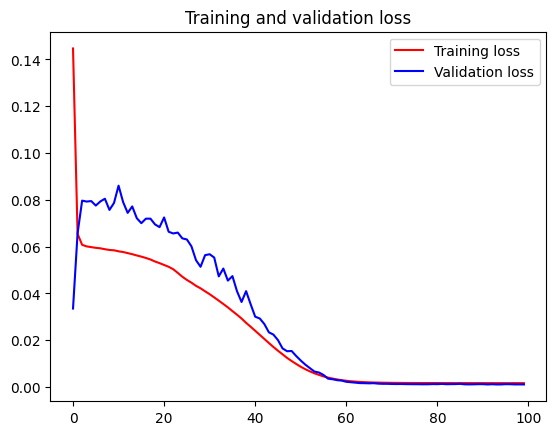

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
# Now you can make predictions
train_predict = best_model.predict(X_train)
test_predict = best_model.predict(X_test)
train_predict.shape, test_predict.shape

13/13 [==============================] - 0s 3ms/step


((587, 1), (387, 1))

In [ ]:
# Transform back to original form
train_predict = train_predict.reshape(-1, 1)
test_predict = test_predict.reshape(-1, 1)

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

ACCURACY OF BEST MODEL

In [ ]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  2098.1273258309457
Train data MSE:  4402138.275398516
Train data MAE:  1579.0891250468487
-------------------------------------------------------------------------------------
Test data RMSE:  1701.6079847848473
Test data MSE:  2895469.733883549
Test data MAE:  1217.7623294570415


In [ ]:
print("Train data explained variance regression score:",
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:",
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9746829950178848
Test data explained variance regression score: 0.8949596923380566


VISUALIZATION OF PRICE PREDICTIONS AND COMPARISONS

In [ ]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (1006, 1)
Test predicted data:  (1006, 1)


In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

print(temp_input)


from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        print( n_steps)

        yhat = best_model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)

        lst_output.extend(yhat.tolist())
        i=i+1

    else:

        x_input = x_input.reshape((1, n_steps,1))
        yhat = best_model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())

        lst_output.extend(yhat.tolist())
        i=i+1

print("Output of predicted next days: ", len(lst_output))

[0.3837035178429477, 0.40374710218008275, 0.4157372377181527, 0.4123397962654652, 0.41072658680790936, 0.4000628377685879, 0.38143164153741377, 0.42668003940836946, 0.3933500336085279, 0.4018845634504555, 0.4016725015402219, 0.417138913350466, 0.41888497268416797, 0.3867652511824378, 0.4180232967480611]
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
Output of predicted next days:  30


In [ ]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


In [ ]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])


fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
import joblib
import pickle

# saving the scaler object using joblib for later use in ensemble models
joblib.dump(scaler, '/content/drive/My Drive/Colab Notebooks/btc_scaler.pkl')

# Save the model
best_model.save('/content/drive/My Drive/Colab Notebooks/btc_best_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.

